In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
X, y = data.data, data.target

In [4]:
iris = pd.DataFrame(X, columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
iris['species'] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[Quiz] species에 있는 문자열이 너무 길어서, 첫 3개의 문자열만 담고, 이를 대문자로 표기하고자 한다. 이를 수행해보자.

In [7]:
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"] 

train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [8]:
adult = pd.read_csv(train_url, names=features)
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
eduVal = adult.Education.value_counts()
print(eduVal.size)
eduVal

16


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [10]:
objectCols = adult.dtypes[adult.dtypes == 'object'].index
objectCols

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country', 'Target'],
      dtype='object')

In [11]:
for colm in objectCols:
    adult[colm] = pd.Categorical(adult[colm])
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  int64   
 1   Workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Education-Num   32561 non-null  int64   
 5   Martial Status  32561 non-null  category
 6   Occupation      32561 non-null  category
 7   Relationship    32561 non-null  category
 8   Race            32561 non-null  category
 9   Sex             32561 non-null  category
 10  Capital Gain    32561 non-null  int64   
 11  Capital Loss    32561 non-null  int64   
 12  Hours per week  32561 non-null  int64   
 13  Country         32561 non-null  category
 14  Target          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [12]:
for colm in objectCols:
    print(colm)
    print(adult[colm].value_counts())
    print("==================")

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Martial Status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Martial Status, dtype: int64
Occupation
 Prof-specialty       41

In [13]:
adult.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [14]:
stg = adult.groupby(['Sex', 'Target']).size()
stg

Sex      Target
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64

In [15]:
adult.groupby(['Sex', 'Target']).size().unstack()

Target,<=50K,>50K
Sex,,
Female,9592,1179
Male,15128,6662


In [16]:
adult.groupby(['Sex', 'Target']).size().unstack() / stg.sum()

Target,<=50K,>50K
Sex,,
Female,0.294586,0.036209
Male,0.464605,0.204601


[Quiz] Education, Race, Country에 대해서도 Target과의 교차빈도표(빈도비율)을 작성해보자.

In [17]:
for col in ['Education', 'Race', 'Country']:
    tmp = adult.groupby([col, 'Target']).size()
    sums = tmp.sum()
    print("======" + col + "======")
    tmp = tmp.unstack() / sums
    tmp.columns = tmp.columns.astype('str')
    tmp['50Rate'] = tmp[' >50K'] / tmp[' <=50K']
    print(tmp)
    print()

======Education======
Target            <=50K      >50K    50Rate
Education                                  
 10th          0.026750  0.001904  0.071183
 11th          0.034243  0.001843  0.053812
 12th          0.012285  0.001013  0.082500
 1st-4th       0.004975  0.000184  0.037037
 5th-6th       0.009736  0.000491  0.050473
 7th-8th       0.018611  0.001228  0.066007
 9th           0.014957  0.000829  0.055441
 Assoc-acdm    0.024631  0.008139  0.330424
 Assoc-voc     0.031357  0.011087  0.353575
 Bachelors     0.096250  0.068210  0.708679
 Doctorate     0.003286  0.009398  2.859813
 HS-grad       0.271060  0.051442  0.189780
 Masters       0.023464  0.029452  1.255236
 Preschool     0.001566  0.000000  0.000000
 Prof-school   0.004699  0.012991  2.764706
 Some-college  0.181321  0.042597  0.234925

======Race======
Target                  <=50K      >50K    50Rate
Race                                             
 Amer-Indian-Eskimo  0.008446  0.001106  0.130909
 Asian-Pac-Islande

In [18]:
tmp.columns

Index([' <=50K', ' >50K', '50Rate'], dtype='object', name='Target')

In [19]:
tmp.columns.astype('str')

Index([' <=50K', ' >50K', '50Rate'], dtype='object', name='Target')

In [20]:
numCols = adult.columns.drop(objectCols)
numCols

Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week'],
      dtype='object')

In [21]:
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
numCols = adult.columns.drop(objectCols)
numCols = adult.columns.drop('Education')
numCols

Index(['Age', 'Workclass', 'fnlwgt', 'Education-Num', 'Martial Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [23]:
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education-Num'}>,
        <AxesSubplot:title={'center':'Capital Gain'}>],
       [<AxesSubplot:title={'center':'Capital Loss'}>,
        <AxesSubplot:title={'center':'Hours per week'}>]], dtype=object)

<Figure size 720x1080 with 0 Axes>

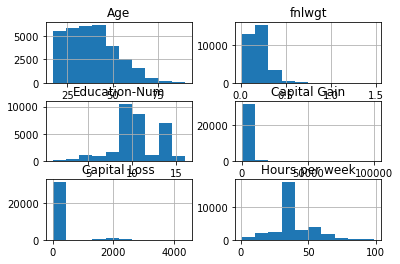

In [24]:
import matplotlib.pyplot as plt
plt.figure (figsize=(10,15))
adult.hist()

In [25]:
numCols = adult.columns[adult.dtypes != 'category']

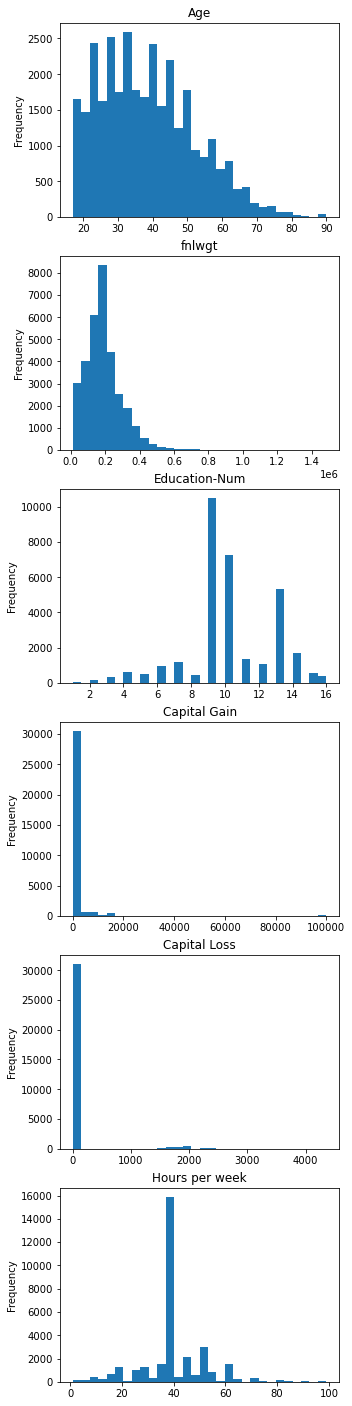

In [26]:
fig, axes = plt.subplots(numCols.size, 1, figsize=(5, 25))
axes = axes.ravel()
for i, colm in enumerate(numCols):
    adult[colm].plot.hist(bins=30, ax = axes[i])
    axes[i].set_title(colm)

(0.0, 100.0)

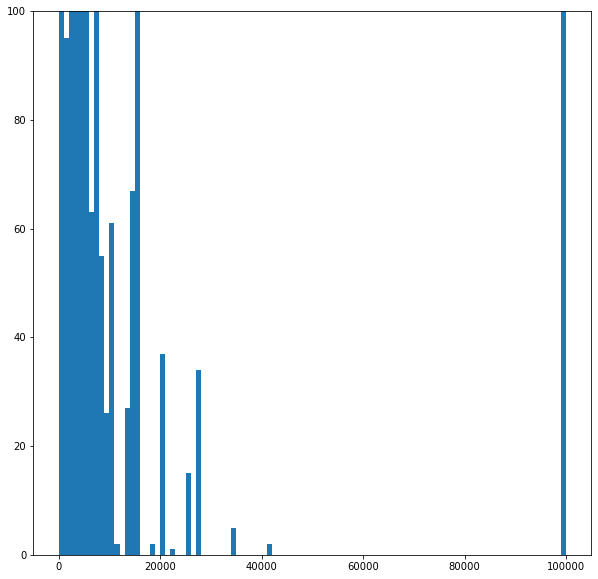

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.hist(adult['Capital Gain'], bins=100)
plt.ylim(0, 100)

In [28]:
adultst = pd.read_csv(test_url, names=features)
adultst[adultst['Capital Gain'] == 99999].size

1275

[Quiz] Capital Loss: 1000을 기준으로 데이터를 나누고

- histogram을 다시 그려보고
- 필요시 1000> 여부를 갖는 파생변수 생성 필요

In [29]:
cl1kl = adult['Capital Loss'][adult['Capital Loss'] <= 1000]
cl1ku = adult['Capital Loss'][adult['Capital Loss'] > 1000]

(0.0, 350.0)

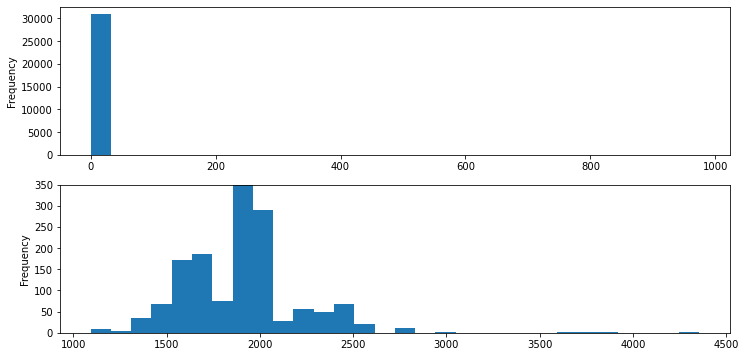

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
axes = axes.ravel()
cl1kl.plot.hist(bins=30, ax=axes[0])
cl1ku.plot.hist(bins=30, ax=axes[1])
plt.ylim(0, 350)

[Quiz]
excel_exam.csv 파일을 이용하여 반별 과목별 평균을 구하고, 반별 과목별로 전체 과목 평균보다 낮은 학생 id를 출력하라.

In [31]:
import numpy as np 
import pandas as pd

In [32]:
df = pd.read_csv('excel_exam.csv')
df.head()

,id,class,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [33]:
meanscores = df.iloc[:, 1:].groupby('class').mean()
meanscores

,math,english,science
class,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [34]:
tm = df.copy().set_index('class')
tm.head()

,id,math,english,science
class,,,,
1,1,50,98,50
1,2,60,97,60
1,3,45,86,78
1,4,30,98,58
2,5,25,80,65


In [35]:
tm.iloc[:, 1:] = tm.iloc[:, 1:] - meanscores
tm.head()

,id,math,english,science
class,,,,
1,1,3.75,3.25,-11.50
1,2,13.75,2.25,-1.50
1,3,-1.25,-8.75,16.50
1,4,-16.25,3.25,-3.50
2,5,-36.25,-4.25,6.75


In [36]:
np.where(tm.math > 0, np.nan, tm.id)

array([nan, nan,  3.,  4.,  5.,  6., nan, nan,  9., nan, nan, 12., 13.,
       14., nan, nan, 17., nan, nan, 20.])

In [37]:
f = lambda x: np.where(x > 0, np.nan, tm.id)

In [38]:
f(tm.math)

array([nan, nan,  3.,  4.,  5.,  6., nan, nan,  9., nan, nan, 12., 13.,
       14., nan, nan, 17., nan, nan, 20.])

In [39]:
tm.iloc[:, 1:].transform(f)

,math,english,science
class,,,
1,NaN,NaN,1.0
1,NaN,NaN,2.0
1,3.0,3.0,NaN
1,4.0,NaN,4.0
2,5.0,5.0,NaN
2,6.0,NaN,NaN
2,NaN,NaN,7.0
2,NaN,8.0,8.0
3,9.0,NaN,9.0


위 결과에서 :
- 반별 저점자 순으로 정렬하고, 
- 모두 결측치인 행은 제거하여 
좀 더 스마트한 보고서를 제출해보자.